In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [61]:
# number of simulation folders
max_sim=2

## Type of simulation
type_sim = 'all'
#type_sim = 'neighbors'


In [62]:
acceptance_array = []

for idx in range(1,(max_sim+1)):
    # define path of the idx-th simulation 
    #acceptance_path = f'/import/a12/users/jacopo/transf_temp/all_atom_replica_results_chignolin/exchange_{type_sim}/sim{idx}'
    acceptance_path = f'/import/a12/users/jacopo/transf_temp/sim_test/sim{idx}'
    # load all the acceptance matrix in the folder 
    accc_fns = sorted(glob(f'{acceptance_path}/acceptance*'))

    acceptance = None
    for fn in accc_fns:
        if acceptance is None:
            acceptance = np.load(fn)
        else:
            acceptance += np.load(fn)
    acceptance_array.append(acceptance)

acceptance_array = np.array(acceptance_array)
print(f'Acceptance array shape: {acceptance_array.shape}')

# Compute the global acceptanace matrix
global_acceptance = np.sum(acceptance_array, axis=0)

assert global_acceptance.shape == (36,36)
print(f'Sum of all the acceptance matrices shape: {global_acceptance.shape}')



Acceptance array shape: (2, 36, 36)
Sum of all the acceptance matrices shape: (36, 36)


In [3]:
acceptance_array = []


# define path of the idx-th simulation 
#acceptance_path = f'/import/a12/users/jacopo/transf_temp/all_atom_replica_results_chignolin/exchange_{type_sim}/sim{idx}'
acceptance_path = f'/import/a12/users/jacopo/transf_temp/sim_test/sim00'
# load all the acceptance matrix in the folder 
accc_fns = sorted(glob(f'{acceptance_path}/acceptance*'))
acceptance = None
for fn in accc_fns:
    if acceptance is None:
        acceptance = np.load(fn)
    else:
        acceptance += np.load(fn)
acceptance_array.append(acceptance)

acceptance_array = np.array(acceptance_array)
print(f'Acceptance array shape: {acceptance_array.shape}')

# Compute the global acceptanace matrix
global_acceptance = np.sum(acceptance_array, axis=0)

assert global_acceptance.shape == (36,36)
print(f'Sum of all the acceptance matrices shape: {global_acceptance.shape}')

Acceptance array shape: (1, 36, 36)
Sum of all the acceptance matrices shape: (36, 36)


In [4]:
# Compute different order exchange 
order_exchange = []
order_exchange_mean = []
for order in range(36):
    if order == 0:
        order_exchange.append(np.diag(global_acceptance,order))
    else:
        exchange = np.diag(global_acceptance,order) / np.diag(global_acceptance,-order)
        exchange[np.argwhere(np.isnan(exchange))] = 0
        order_exchange.append(exchange)
    order_exchange_mean.append(order_exchange[-1].mean(axis=0))


# Check all elements in the diagonal are 0
assert order_exchange[0].all() == 0



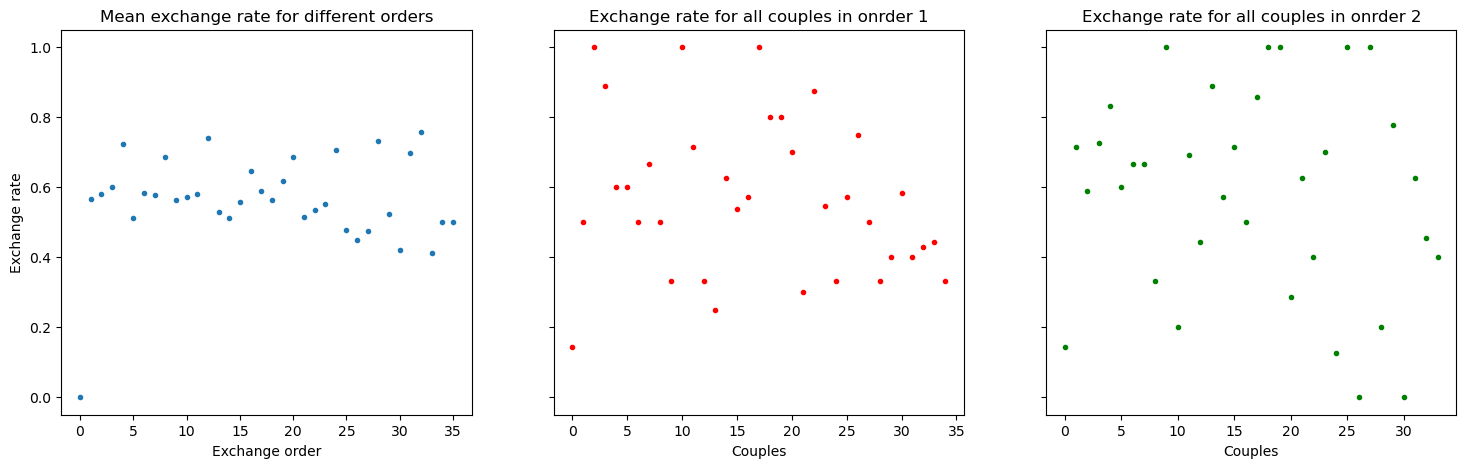

In [5]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharey=True)

ax[0].plot(order_exchange_mean, '.')
ax[0].set_title('Mean exchange rate for different orders')
ax[0].set_ylabel('Exchange rate')
ax[0].set_xlabel('Exchange order')

ax[1].plot(order_exchange[1], '.', c='r')
ax[1].set_title('Exchange rate for all couples in onrder 1')
ax[1].set_xlabel('Couples')


ax[2].plot(order_exchange[2], '.', c='g')
ax[2].set_title('Exchange rate for all couples in onrder 2')
ax[2].set_xlabel('Couples')


plt.show()

In [6]:
traj_history = np.load(f'{acceptance_path}/temperature_history.npy')

In [31]:
traj_history.shape
Temperatures = [280,283,286,289,292,295,298,301,304,307,310,313,316,320,323,326,330,333,336,340,343,347,350,354,358,361,365,369,372,376,380,384,388,392,396,400]

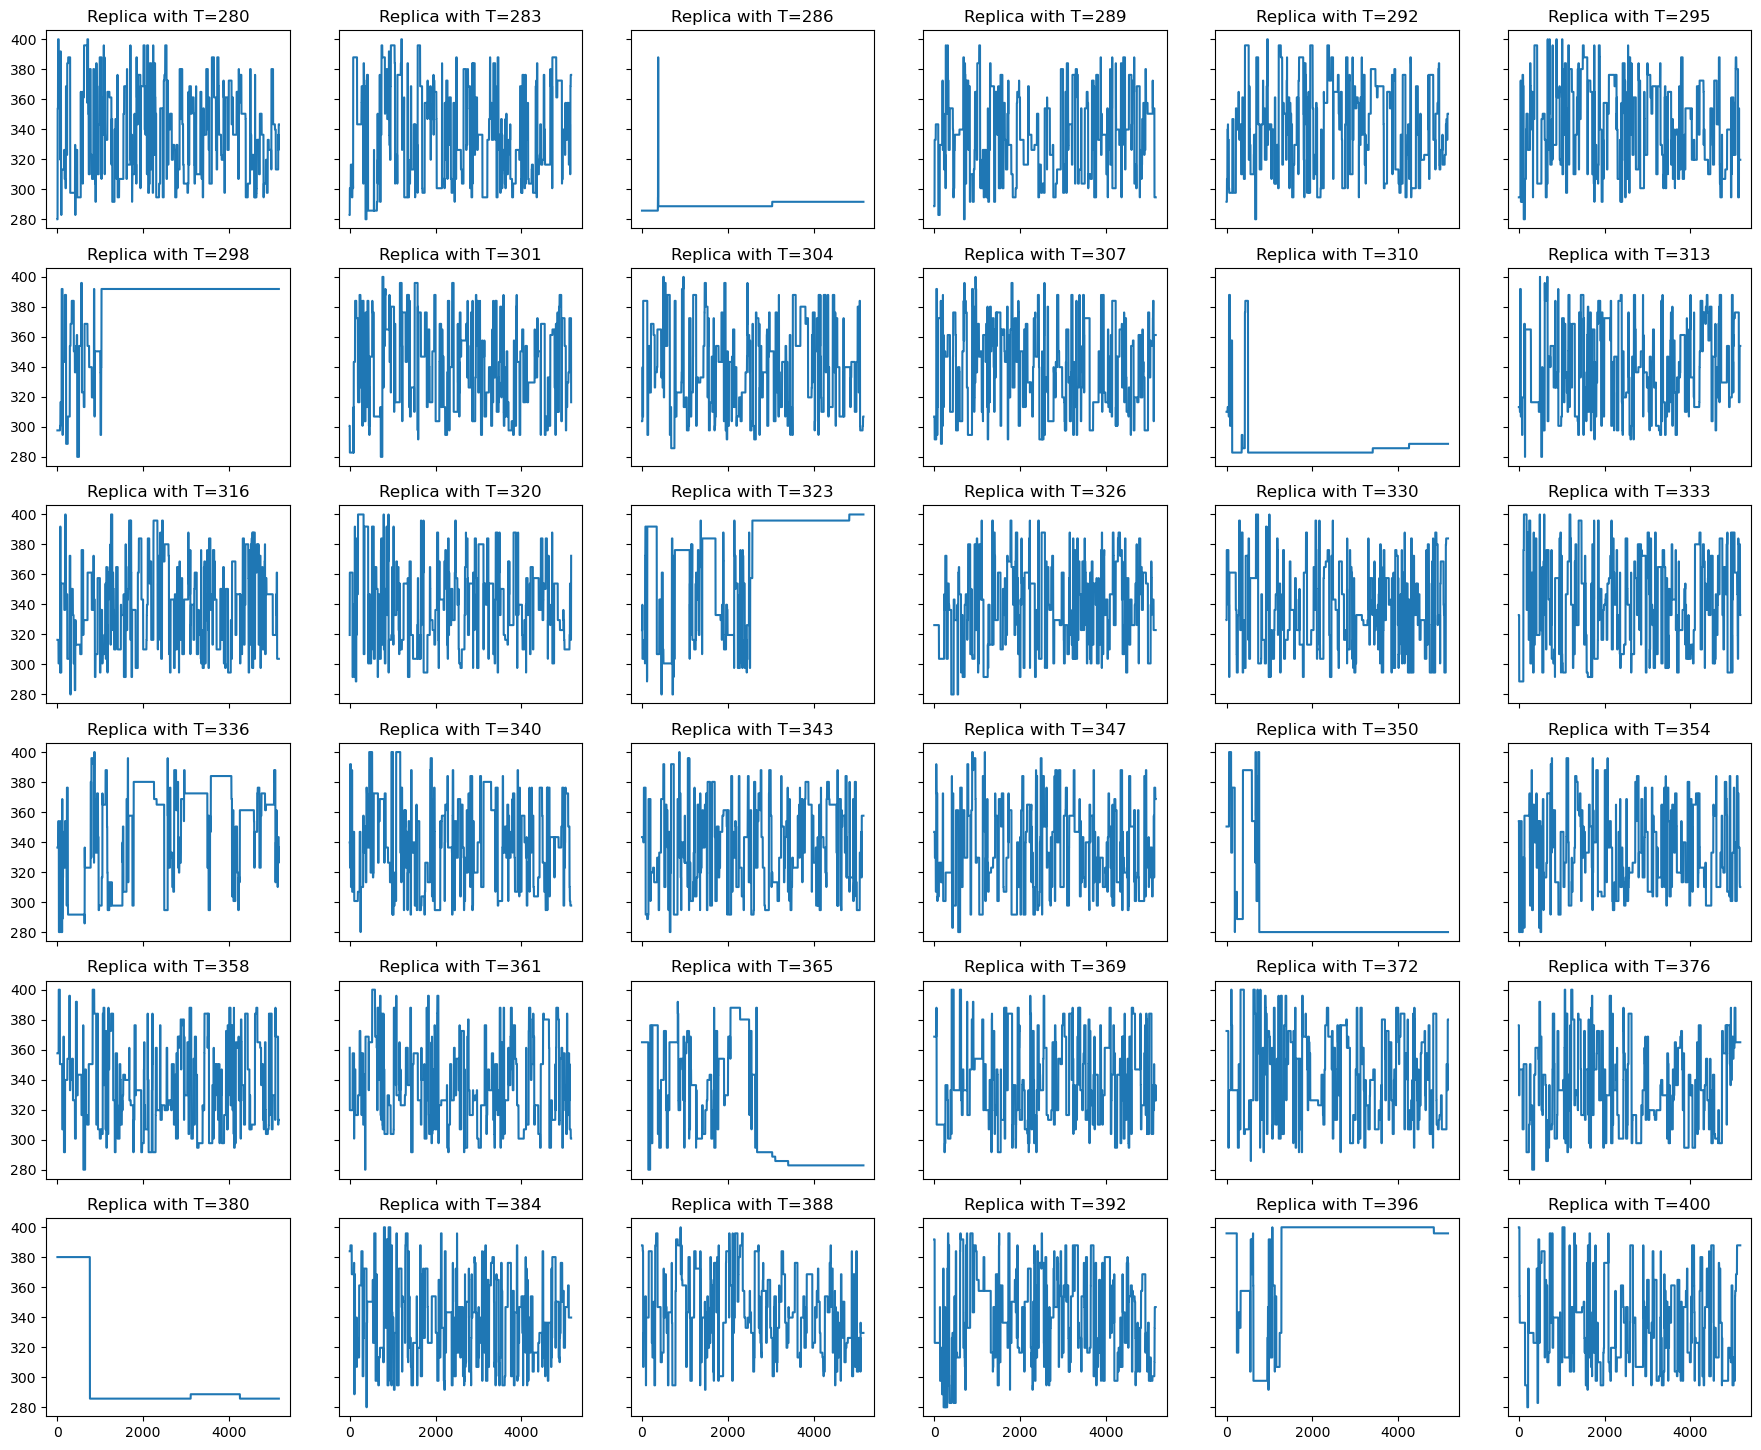

In [33]:
fig, ax = plt.subplots(6,6, figsize=(22,18), sharex=True, sharey=True)

for i, ax in enumerate(fig.axes):
    ax.plot(traj_history.T[i])
    ax.set_title(f'Replica with T={Temperatures[i]}')